In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Example of Probability Calculations

The explanation below is adapted from a [Stack Overflow Answer](https://stackoverflow.com/questions/12412895/how-to-calculate-probability-in-a-normal-distribution-given-mean-standard-devi)

Let's say body temperature is normally distributed with mean 98.2 Fahrenheit and std dev 0.73 Fahrenheit.

In [2]:
# Set the body temperature distribution to be normal
mean_temp = 98.2
std_temp = 0.73
bodytemp_norm = stats.norm(loc=mean_temp, scale=std_temp)
#where loc is the mean and scale is the std dev

## Probability Density Function

We can plot the distribution using the probability density function, pdf. First we will generate a set of numbers from the distribution to plot.

In [3]:
# get a set of 50 numbers within 3 standard deviations from the mean
x = np.linspace(mean_temp-3*std_temp,mean_temp+3*std_temp,50)

# Calculate the probability density function (PDF) for the given parameters
pdf = bodytemp_norm.pdf(x)

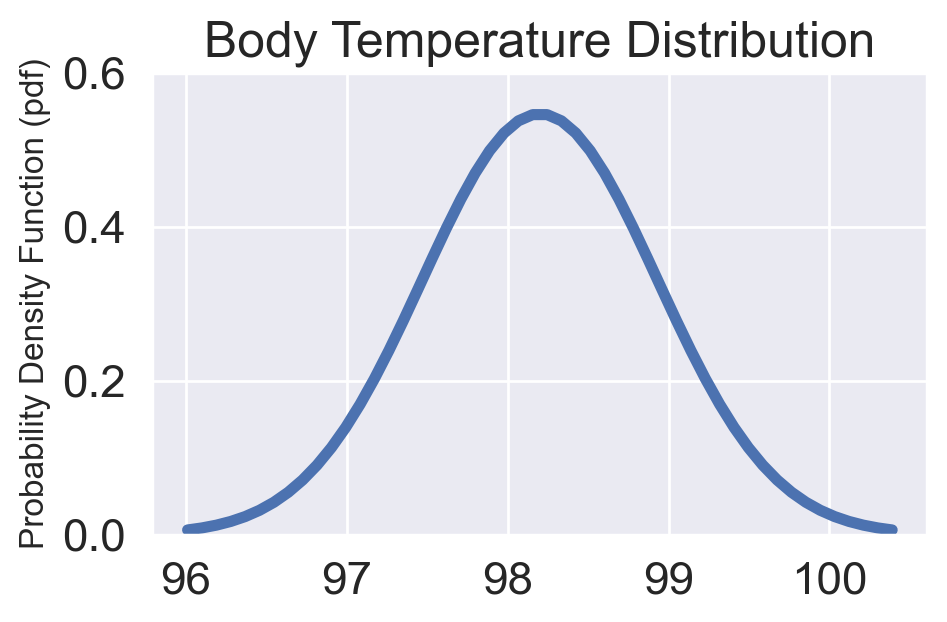

In [6]:
# Create a plot for the pdf function
figure,ax = plt.subplots(figsize=(5,3))

# plot the numbers with the probability density function
ax.plot(x, pdf,lw=4)
ax.set_ylim([0,pdf.max()+pdf.max()*0.1])
ax.set_ylabel('Probability Density Function (pdf)', fontsize=12)
ax.set_title('Body Temperature Distribution')
plt.show()

## Cumulative Density Function

To find the probability that the body temperature of an individual has a value LESS than let's say 97.24, you'd use `cdf`, the Cumulative Density Function.

In [7]:
#To find the probability that the variable has a value LESS than or equal to 97.4
bodytemp_norm.cdf(97.24)

0.0942434421420551

## Probability Density Function vs Cumulative Density Function

The probability density function, `pdf(x)` gives the shape of the distribution, while the cumulative density function `cdf(x)` gives the probability that a randomly selected value from the distribution is less than **x**. We can see the results of the two functions in the plot below.

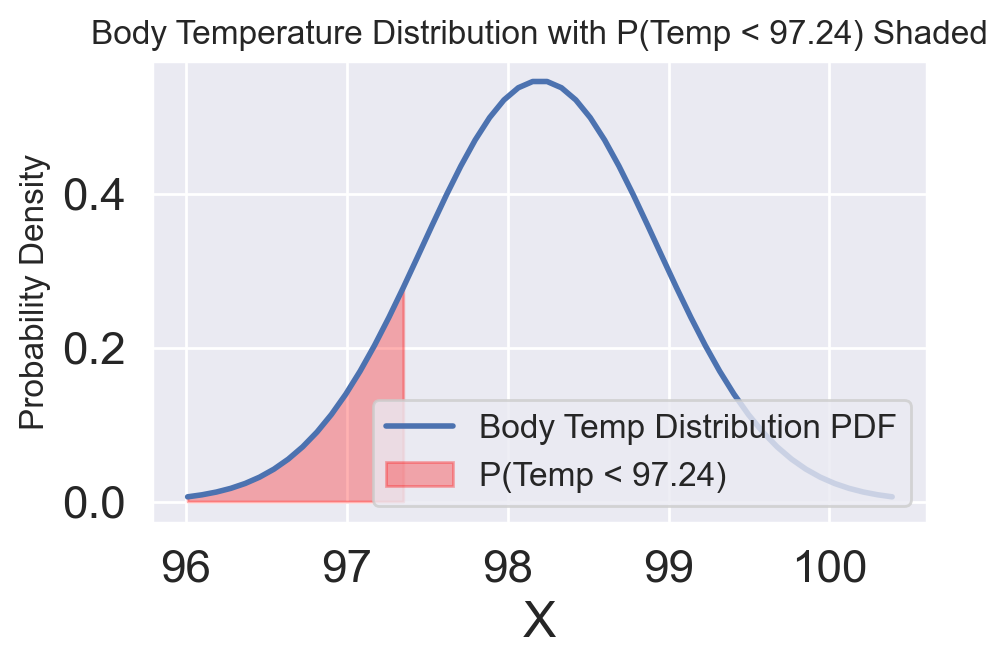

Probability (X < 97.24) = 0.0942


In [8]:
# Using the same distribution and x values defined before

# Calculate the cumulative distribution function (CDF) up to 97.24
cdf_value = bodytemp_norm.cdf(97.24)

# Plot the normal distribution
plt.figure(figsize=(5, 3))
plt.plot(x, pdf, 'b-', lw=2, label='Body Temp Distribution PDF')

# Shade the area under the curve less than 97.4
plt.fill_between(x, pdf, where=(x < 97.4), color='red', alpha=0.3, label='P(Temp < 97.24)')


plt.title('Body Temperature Distribution with P(Temp < 97.24) Shaded', fontsize=12)
plt.xlabel('X')
plt.ylabel('Probability Density', fontsize=12)
plt.legend(fontsize=12, loc='lower right')
plt.grid(True)
plt.show()

print(f'Probability (X < 97.24) = {cdf_value:.4f}')

## Survival Function

To find the probability that the variable has a value GREATER than or
equal to 97.24, you'd use the Survival Function, `sf` 

In [9]:
#To find the probability that the body temperature is greater than 97.24
bodytemp_norm.sf(97.24)

0.905756557857945

In [10]:
bodytemp_norm.sf(97.24) + bodytemp_norm.cdf(97.24)

1.0

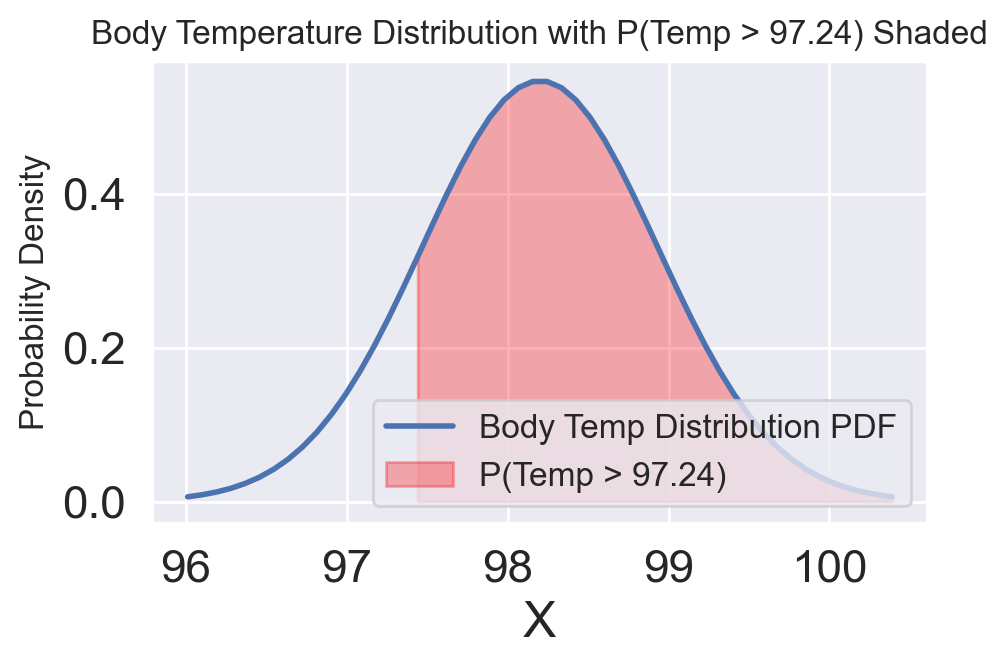

Probability (X > 97.24) = 0.9058


In [13]:
## Can you modify the plot for the cdf function to show area returned by the result?
# Using the same distribution and x values defined before

# Calculate the cumulative survival function (CDF) up to 97.24
sf_value = bodytemp_norm.sf(97.24)

# Plot the normal distribution
plt.figure(figsize=(5, 3))
plt.plot(x, pdf, 'b-', lw=2, label='Body Temp Distribution PDF')

# Shade the area under the curve less than 97.4
plt.fill_between(x, pdf, where=(x > 97.4), color='red', alpha=0.3, label='P(Temp > 97.24)')


plt.title('Body Temperature Distribution with P(Temp > 97.24) Shaded', fontsize=12)
plt.xlabel('X')
plt.ylabel('Probability Density', fontsize=12)
plt.legend(fontsize=12, loc='lower right')
plt.grid(True)
plt.show()

print(f'Probability (X > 97.24) = {sf_value:.4f}')

## Percent Point Function

To find the variate for which the probability is given, let's say the value which is needed to provide a 30% probability, you'd use the Percent Point Function, `ppf`

In [14]:
# Find the temperature where there'sa 30% probability that a randomly selected individual has less than that value
bodytemp_norm.ppf(0.30)

97.81718762572314

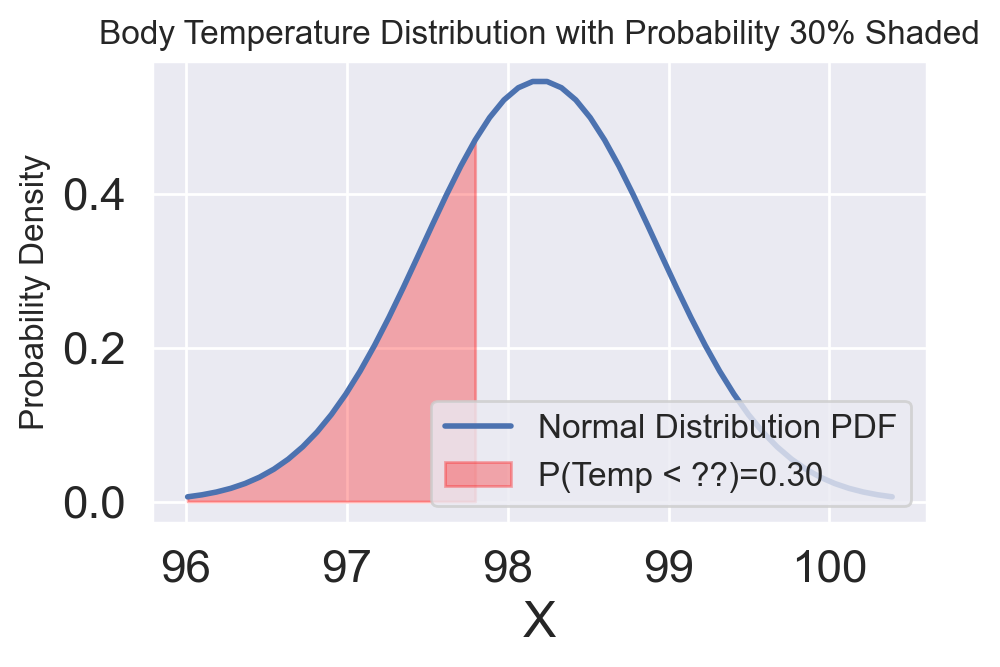

Probability (X < 97.817) = 0.30


In [15]:
# Using the same distribution and x values defined before

# Calculate the percent point function (PPF) for 0.30
ppf_value = bodytemp_norm.ppf(0.30)

# Plot the normal distribution
plt.figure(figsize=(5, 3))
plt.plot(x, pdf, 'b-', lw=2, label='Normal Distribution PDF')

# Shade the area under the curve less than ppf value
plt.fill_between(x, pdf, where=(x < ppf_value), color='red', alpha=0.3, label='P(Temp < ??)=0.30')


plt.title('Body Temperature Distribution with Probability 30% Shaded', fontsize=12)
plt.xlabel('X')
plt.ylabel('Probability Density', fontsize=12)
plt.legend(fontsize=12, loc='lower right')
plt.grid(True)
plt.show()

print(f'Probability (X < {ppf_value:.3f}) = 0.30')

## Generate random values from the distribution

The `rvs` function will generate the required number of random values that fall in this distribution. 

(array([ 1.,  1.,  3.,  9., 12., 19., 16., 16., 16.,  7.]),
 array([95.73916895, 96.13689134, 96.53461373, 96.93233612, 97.33005852,
        97.72778091, 98.1255033 , 98.52322569, 98.92094808, 99.31867048,
        99.71639287]),
 <BarContainer object of 10 artists>)

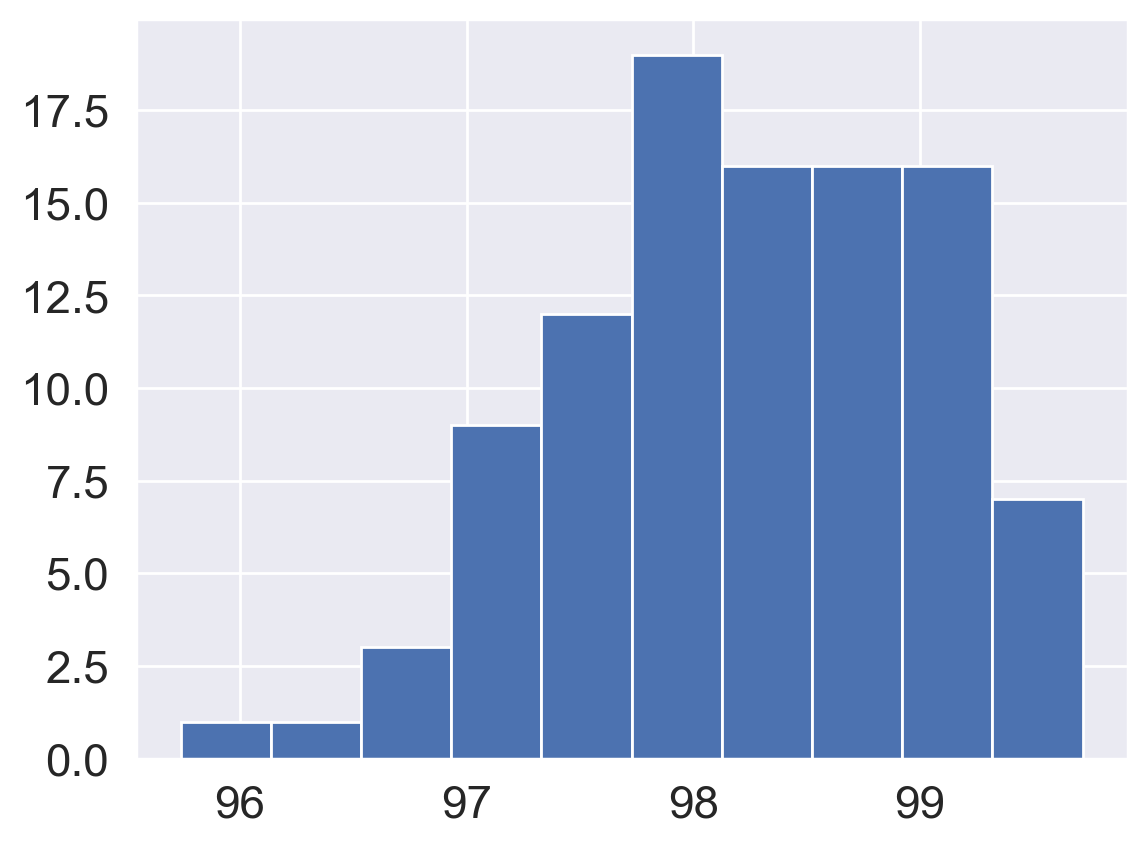

In [16]:
# Generate 100 random numbers from this distribution
random_temps = bodytemp_norm.rvs(100)

# Plot the points - what is the difference in the plot when you generate 10, 100,1000, 10000 numbers?
plt.hist(random_temps)